In [1]:
%reset -f

# Functions

In [246]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [12]:
colors ={
    'red': '#EB1E2C',
    'orange1': '#FD6F30',
    'orange2': '#F9A729',
    'yellow': '#F9D23C',
    'green': '#5FBB68',
    'blue': '#00A5E3',
    'teal': '#64CDCC',
    'aqua': '#91DCEA',
    'purple': '#A4A4D5',
    'ligth_purple': '#BBC9E5',
}

In [3]:
pd.read_csv('Magic Gamma Telescope Data Set\magic+gamma+telescope\magic04.data')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\vonst\AppData\Local\Temp\ipykernel_7736\2611517025.py:1: SyntaxWarning: invalid escape sequence '\m'
  pd.read_csv('Magic Gamma Telescope Data Set\magic+gamma+telescope\magic04.data')


,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [196]:
columns_dataframe = [
    'fLength'
  , 'fWidth'
  , 'fSize'
  , 'fConc'
  , 'fConc1'
  , 'fAsym'
  , 'fM3Long'
  , 'fM3Trans'
  , 'fAlpha'
  , 'fDist'
  , 'class'
]

In [6]:
df = pd.read_csv('Magic Gamma Telescope Data Set\magic+gamma+telescope\magic04.data', names = columns_dataframe)
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\vonst\AppData\Local\Temp\ipykernel_7736\4011126780.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('Magic Gamma Telescope Data Set\magic+gamma+telescope\magic04.data', names = columns)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
df['class'].unique()

array(['g', 'h'], dtype=object)

Dado que la columna 'class' tiene dos valores, se puede convertir en 1 y 0 con el siguiente comando

In [8]:
df['class_binary'] = (df['class'] == 'g').astype(int) 

In [9]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class,class_binary
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g,1


In [10]:
df['class_binary'].unique()

array([1, 0])

In [11]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class,class_binary
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12327,12.8703,11.4444,2.3811,0.7360,0.3805,-15.0946,5.3032,11.6208,21.0120,204.0370,g,1
12328,26.8595,20.5946,2.8754,0.3438,0.2152,-3.4556,-20.0014,-9.0535,3.9848,205.4980,g,1
12329,22.0913,10.8949,2.2945,0.5381,0.2919,15.2776,18.2296,7.3975,21.0680,123.2810,g,1
12330,56.2216,18.7019,2.9297,0.2516,0.1393,96.5758,-41.2969,11.3764,5.9110,197.2090,g,1


How to calculate de bins of a histogram

In order to calculate the bin widths we are going to use the Freedman-Diaconis rule whic set the bid width to $b = \frac{max(n)-min(n)}{h}$ where $h = 2\ \mathrm{IQR}\ n^{-1/3}$ and $n$ is the number of observations. 

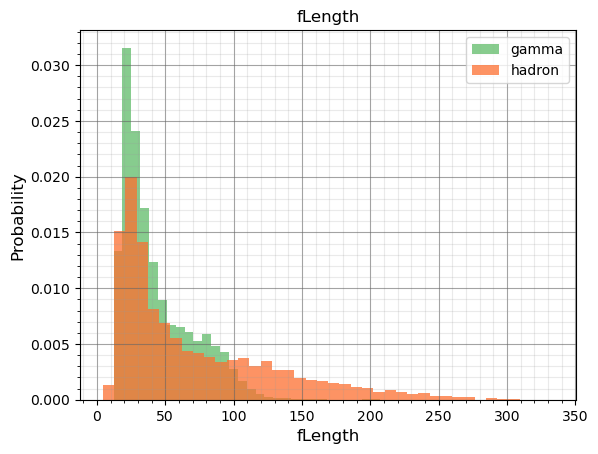

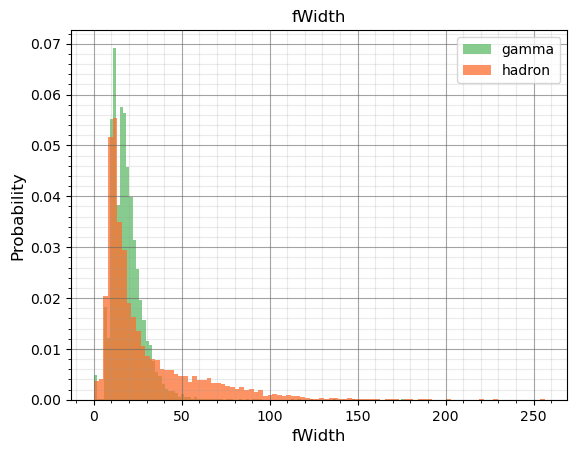

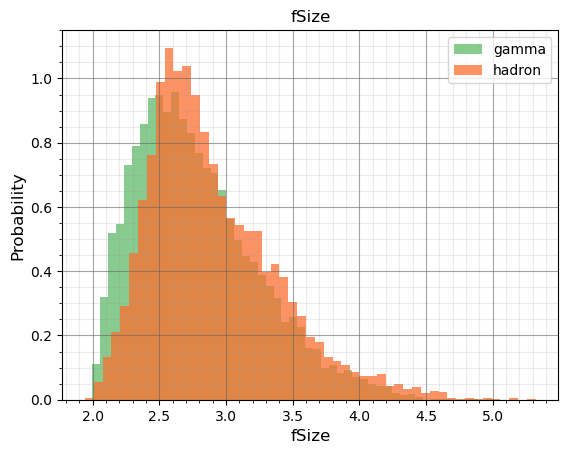

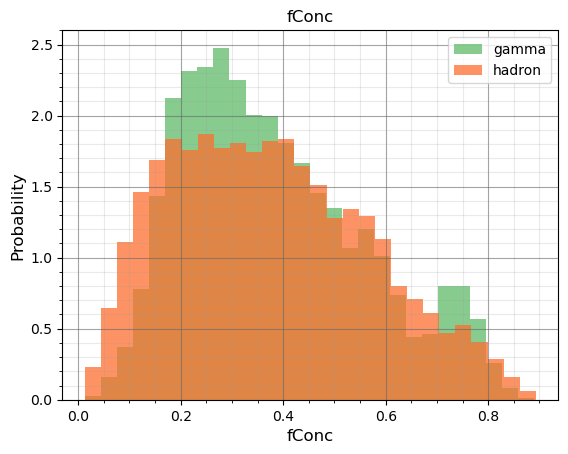

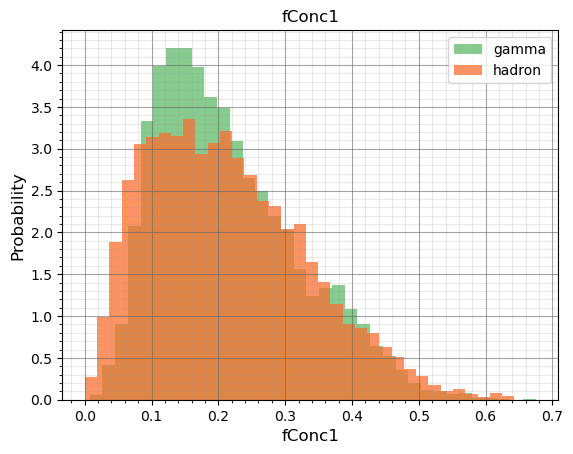

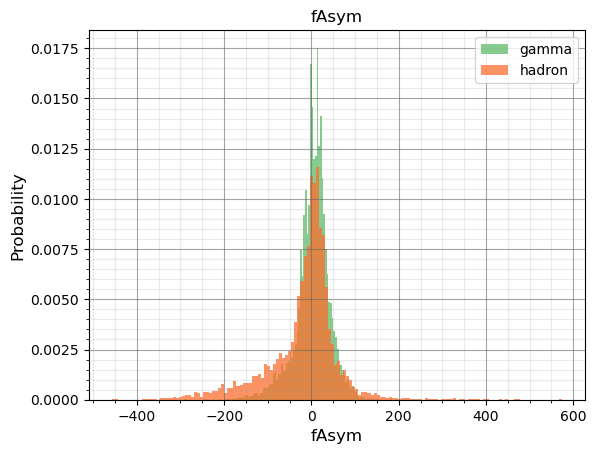

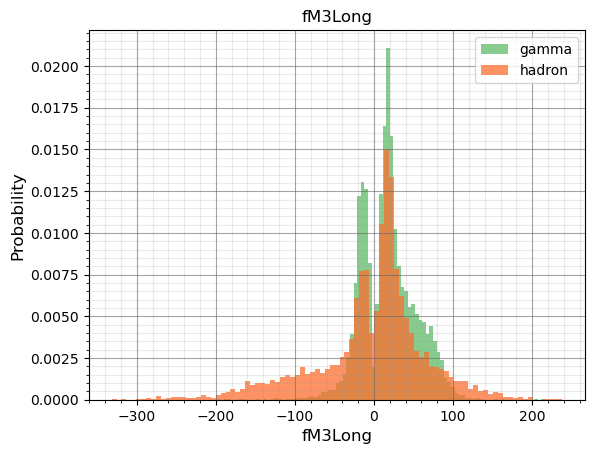

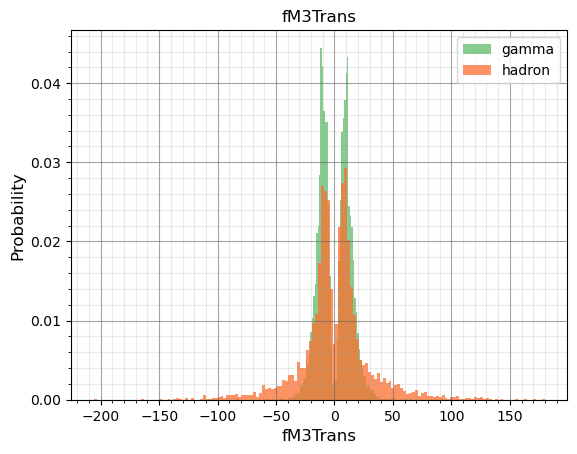

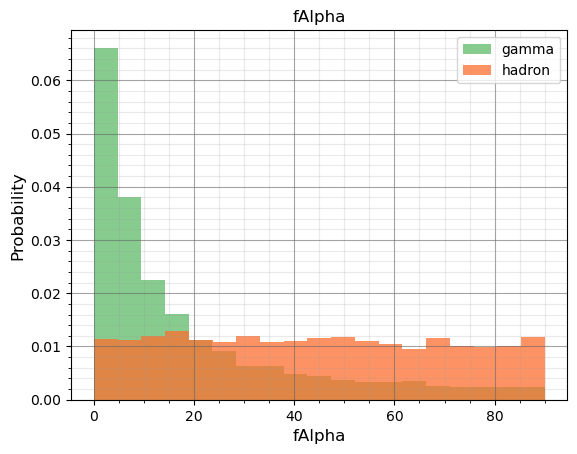

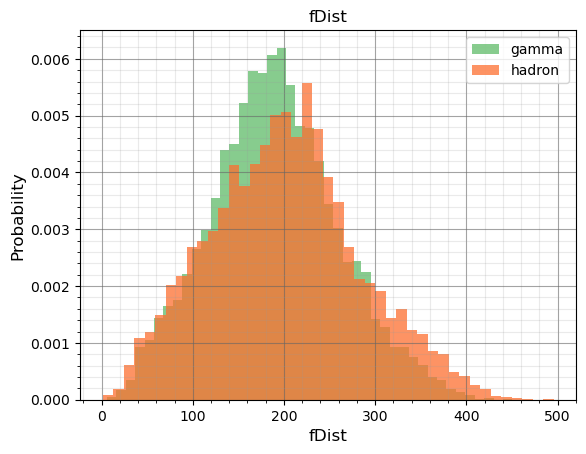

In [15]:
for i in columns_dataframe[:-1]:
  data_hist_g = df[df['class_binary'] == 1][i]
  data_hist_h = df[df['class_binary'] == 0][i]

  # Freedman-Diaconis rule
  q75, q25 = np.percentile(data_hist_g, [75 ,25])
  iqr = q75 - q25
  h = 2 * iqr * (len(data_hist_g) ** (-1/3))
  b = (max(data_hist_g) - min(data_hist_g)) / h
  b = int(round(b, 0))

  # Freedman-Diaconis rule
  q75, q25 = np.percentile(data_hist_h, [75 ,25])
  iqr = q75 - q25
  h = 2 * iqr * (len(data_hist_h) ** (-1/3))
  b = (max(data_hist_h) - min(data_hist_h)) / h
  b = int(round(b, 0))

  plt.hist(data_hist_g, bins = b, color = colors['green'], label = 'gamma', log = False, histtype = "stepfilled", alpha = 0.75, density = True)
  plt.hist(data_hist_h, bins = b, color = colors['orange1'], label = 'hadron', log = False, histtype = "stepfilled", alpha = 0.75, density = True)
  
  plt.legend(framealpha = 0.8, fontsize = "medium", facecolor = "white")
  plt.grid(visible = True, which = "major", color = "#666666", linestyle = "-", alpha = 0.6)
  plt.minorticks_on()
  plt.grid(visible = True, which = "minor", color = "#999999", linestyle = "-", alpha = 0.2)

  plt.ylabel('Probability', fontsize = 'large')
  plt.xlabel(i, fontsize = 'large')
  plt.title(i, fontsize = 'large')

  plt.show()

# Creating the Train, validation and test datasets

In [ ]:
def scale_dataset(df, oversample = False):
  x = df[df.columns[:-2]].values
  y = df[df.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(x) 

  if oversample == True:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  y_reshape = np.reshape(y, (len(y), 1))

  data = np.hstack((X, y_reshape))

  return data, X, y

In [20]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class,class_binary
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h,0


In [19]:
df.sample(frac = 1)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class,class_binary
6948,19.3043,18.0716,2.3802,0.4292,0.2562,13.9881,16.0234,-15.1188,63.7090,118.9490,g,1
11429,94.5656,24.9475,3.1767,0.2057,0.1089,53.6245,77.9926,11.0564,7.7603,290.4820,g,1
6331,80.0032,21.2266,3.2118,0.2039,0.1022,-131.5040,64.7447,13.4333,9.0410,303.4670,g,1
18107,127.4199,27.7732,3.2853,0.3118,0.1852,-79.2715,-102.7032,-19.8884,19.7812,297.1553,h,0
13592,65.5156,21.3195,2.6325,0.2590,0.1041,-32.1870,-42.0343,-16.0832,21.5767,38.8330,h,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4865,27.1565,14.7561,2.4683,0.4150,0.2092,25.4134,23.4275,11.4812,69.7617,108.0170,g,1
3429,75.1882,18.6423,2.9571,0.2241,0.1209,5.3992,63.8301,-10.5364,1.2530,250.8620,g,1
19007,115.2640,14.0075,2.8540,0.7544,0.4136,-88.2076,-117.4860,8.4777,28.0100,336.9910,h,0
4013,84.2237,27.3557,3.4550,0.1708,0.0858,59.6588,86.4620,-10.9931,0.0759,189.8460,g,1


## Dividiendo el dataframe original en 3, train, validation y test

In [24]:
splits = [int(0.6 * len(df)), int(0.8 * len(df))]
train, valid, test = np.split(df.sample(frac = 1), splits)

c:\Users\vonst\anaconda3\envs\main\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [173]:
print(
    'length of train dataset:', len(train)
  , '\nlength of validation dataset:', len(valid)
  , '\nlength of test dataset:', len(test)
  , '\nlength of the sum of the three datasets must be equal to the original dataset:' , len(train) + len(valid) + len(test) == len(df)
)

length of train dataset: 11412 
length of validation dataset: 3804 
length of test dataset: 3804 
length of the sum of the three datasets must be equal to the original dataset: True


## Tomar las columnas relevantes del dataframe

Como en el dataframe original creé una columna, realizar estos dos comandos son equivalentes:
  1. usa las columnas del dataframe original y se quita la última [:-1]
  2. usa las columnas del dataframe nuevo y se quitan las dos últimas columnas [:-2]

In [71]:
df[columns_dataframe[:-1]].head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [128]:
df[df.columns[:-2]].head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


## Convertir las filas de un dataframe en un array
  1. convierte las primeras columnas del dataframe en un array de listas
  2. convierte la última fila del dataframe en un array

In [105]:
x = df[df.columns[:-2]].values
x

array([[ 28.7967,  16.0021,   2.6449, ...,  -8.2027,  40.092 ,  81.8828],
       [ 31.6036,  11.7235,   2.5185, ...,  -9.9574,   6.3609, 205.261 ],
       [162.052 , 136.031 ,   4.0612, ..., -45.216 ,  76.96  , 256.788 ],
       ...,
       [ 75.4455,  47.5305,   3.4483, ...,  -9.4662,  30.2987, 256.5166],
       [120.5135,  76.9018,   3.9939, ..., -63.8389,  84.6874, 408.3166],
       [187.1814,  53.0014,   3.2093, ...,  31.4755,  52.731 , 272.3174]])

In [93]:
y = df[df.columns[-1]].values
y

array([1, 1, 1, ..., 0, 0, 0])

## StandardScaler

Ahora se muestra el funcionamiento de StandardScaler. Si calculamos el promedio por columnas, axis = 0, es decir, como cada fila es un registro de todas las columnas, un registro horizontal donde cada columna es una variable diferente, lo que hace es calcular el promedio y desviación estándar de forma vertical, por cada columna, cada variable, fLength, fWidth, etc... StandardScaler lo que hace es que ese promedio sea cero y la desviación estándar sea 1

In [152]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
X

array([[-0.57722602, -0.33680419, -0.38113037, ..., -0.40584194,
         0.47681587, -1.49786555],
       [-0.51096889, -0.57002666, -0.64859479, ..., -0.49009359,
        -0.81541816,  0.15312459],
       [ 2.56827756,  6.20585836,  2.61578306, ..., -2.18302986,
         1.88922413,  0.84263513],
       ...,
       [ 0.52392318,  1.38177927,  1.31887687, ..., -0.4665087 ,
         0.10163583,  0.83900338],
       [ 1.58775746,  2.98278123,  2.47337518, ..., -3.07720555,
         2.18525981,  2.87032093],
       [ 3.16145936,  1.67999288,  0.81314905, ...,  1.49930076,
         0.96101431,  1.05044239]])

In [240]:
print(
    '\npromedio:', np.mean(x, axis = 0)
  , '\ndesviasión estandar:', np.std(x, axis = 0)
)


promedio: [ 53.25015393  22.18096622   2.82501696   0.38032707   0.21465713
  -4.33174516  10.54554482   0.24972596  27.64570668 193.81802647] 
desviasión estandar: [42.36374124 18.34557401  0.47258622  0.18280834  0.11050789 59.20450555
 50.9987773  20.82689143 26.10293429 74.72982238]


In [241]:
print(
    '\npromedio:', np.mean(X, axis = 0)
  , '\ndesviasión estandar:', np.std(X, axis = 0)
)


promedio: [ 7.17267115e-17 -1.19544519e-16 -2.24145973e-16 -3.02597064e-16
  1.12820140e-16 -5.97722596e-18  4.18405817e-17 -9.71299218e-18
  1.19544519e-17 -8.96583894e-18] 
desviasión estandar: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## numpy reshape

Su función es tomar el vector y y "trasponerlo" de forma vertical

In [154]:
y_reshape = np.reshape(y, (len(y), 1))
y_reshape

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

## numpy hstack

Su función es unir un array con otro

In [223]:
np.hstack((X, y_reshape))

array([[-0.57722602, -0.33680419, -0.38113037, ...,  0.47681587,
        -1.49786555,  1.        ],
       [-0.51096889, -0.57002666, -0.64859479, ..., -0.81541816,
         0.15312459,  1.        ],
       [ 2.56827756,  6.20585836,  2.61578306, ...,  1.88922413,
         0.84263513,  1.        ],
       ...,
       [ 0.52392318,  1.38177927,  1.31887687, ...,  0.10163583,
         0.83900338,  0.        ],
       [ 1.58775746,  2.98278123,  2.47337518, ...,  2.18525981,
         2.87032093,  0.        ],
       [ 3.16145936,  1.67999288,  0.81314905, ...,  0.96101431,
         1.05044239,  0.        ]])

## RandomOverSampler

Su función es hacer que dos cosas sean iguales, en este caso el vector y toma dos valores 0 y 1, con lo cual, va a hacer que estos tengan la misma cantidad de muestra

In [159]:
ros = RandomOverSampler()
X_resample, y_resample = ros.fit_resample(X, y)

Se puede ver que X_resample, y_resample se parecen, a primera vista, a X, y

In [160]:
X_resample

array([[-0.57722602, -0.33680419, -0.38113037, ..., -0.40584194,
         0.47681587, -1.49786555],
       [-0.51096889, -0.57002666, -0.64859479, ..., -0.49009359,
        -0.81541816,  0.15312459],
       [ 2.56827756,  6.20585836,  2.61578306, ..., -2.18302986,
         1.88922413,  0.84263513],
       ...,
       [-0.52134097, -0.322392  , -0.72858019, ..., -0.83309725,
         0.67259846,  0.28514685],
       [-0.58560583, -0.7134727 , -0.27003953, ...,  0.32590913,
         0.1461519 , -0.36365571],
       [-0.77818797, -0.56239539, -0.4915864 , ...,  0.33433093,
        -0.72317183,  0.43765625]])

In [161]:
y_resample

array([1, 1, 1, ..., 0, 0, 0])

Mirando las longitudes de cada vector se ve que si son diferentes

In [237]:
print(
    'Longitudes de X, y:', len(X), len(y)
  , 'Longitudes de X_resample, y_resample:', len(X_resample), len(y_resample)
)

Longitudes de X, y: 19020 19020 Longitudes de X_resample, y_resample: 24664 24664


Miremos mas a fondo y como varía, primero se vuelve un dataframe para ver los valores que toma cada uno
  1. es y normal, donde la cantidad de muestra de 0 y 1 son diferentes
  1. es y_resample, donde la cantidad de muestra de 0 y 1 es igual

In [234]:
y_data_frame = pd.DataFrame(y, columns = ['class_binary'])

print(
  len(y_data_frame[y_data_frame['class_binary'] == 0])
  , len(y_data_frame[y_data_frame['class_binary'] == 1])
)

6688 12332


In [235]:
y_resample_data_frame = pd.DataFrame(y_resample, columns = ['class_binary'])

print(
  len(y_resample_data_frame[y_resample_data_frame['class_binary'] == 0])
  , len(y_resample_data_frame[y_resample_data_frame['class_binary'] == 1])
)

12332 12332


## Train dataframe

Ahora miremos el dataframe original de Train y apliquemos el scale descrito anteriormente para ver como se ve ahora

In [208]:
train_scale, X_train_scale, y_train_scale = scale_dataset(train, oversample = True)

In [217]:
new_columns_dataframe = columns_dataframe[:-1]
new_columns_dataframe.append('class_binary')
new_columns_dataframe

['fLength',
 'fWidth',
 'fSize',
 'fConc',
 'fConc1',
 'fAsym',
 'fM3Long',
 'fM3Trans',
 'fAlpha',
 'fDist',
 'class_binary']

In [218]:
df_train_scale = pd.DataFrame(train_scale, columns = new_columns_dataframe)
df_train_scale.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class_binary
0,-0.787982,-0.609237,-1.161140,1.611027,2.128796,0.304818,0.170163,-0.496279,1.217335,0.046955,1.0
1,1.361539,0.826573,1.806784,-1.153516,-1.140061,-1.550879,-2.967159,0.405439,0.424143,-0.320153,0.0
2,-0.548033,-0.593755,-0.845127,0.279199,-0.026028,0.095716,0.110004,-0.317063,1.219267,-1.420007,0.0
3,-0.704649,-0.691244,-0.968506,1.549069,1.595289,-0.381880,-0.046626,-0.301685,-0.125771,-1.174319,1.0
4,0.522336,-0.335490,-0.089082,0.155283,-0.034166,1.253462,0.100872,-0.488032,-0.393730,-1.840375,0.0


In [187]:
train.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class,class_binary
4508,20.0044,11.0652,2.2788,0.6737,0.4500,13.7202,19.7044,-9.9991,59.4730,197.5840,g,1
13289,110.8966,37.5048,3.6716,0.1695,0.0885,-96.4045,-140.5629,8.9172,38.7412,170.0706,h,0
17214,30.1506,11.3503,2.4271,0.4308,0.2117,1.3112,16.6312,-6.2395,59.5235,87.6406,h,0
8626,23.5281,9.5551,2.3692,0.6624,0.3910,-27.0313,8.6299,-5.9169,24.3680,106.0540,g,1
13396,75.4110,16.1061,2.7819,0.4082,0.2108,70.0166,16.1647,-9.8261,17.3643,56.1356,h,0


aplicando el scale, se ve que la cantidad de gammas y hadrones ahora es la misma

In [239]:
print(
    'longitud dataframe train sin scale:', len(train)
  , 'gammas:', len(train[train['class_binary'] == 1])
  , 'hadrons:', len(train[train['class_binary'] == 0])

  , '\nlongitud dataframe train con scale:', len(df_train_scale)
  , 'gammas:', len(df_train_scale[df_train_scale['class_binary'] == 1])
  , 'hadrons:', len(df_train_scale[df_train_scale['class_binary'] == 0])
)

longitud dataframe train sin scale: 11412 gammas: 7447 hadrons: 3965 
longitud dataframe train con scale: 14894 gammas: 7447 hadrons: 7447


Aplicando el scale a los dataframes de valid y test

In [242]:
valid_scale, valid_scale, valid_scale = scale_dataset(valid, oversample = False)
test_scale, X_test_scale, y_test_scale = scale_dataset(test, oversample = False)

# K near neighbors

In [257]:
knn_model = KNeighborsClassifier(n_neighbors = 50)
knn_model.fit(X_train_scale, y_train_scale)

KNeighborsClassifier(n_neighbors=50)

In [258]:
y_predict = knn_model.predict(X_test_scale)

In [259]:
print(classification_report(y_test_scale, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      2439
           1       0.77      0.91      0.83      2439

    accuracy                           0.82      4878
   macro avg       0.83      0.82      0.81      4878
weighted avg       0.83      0.82      0.81      4878

